## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT BMW

In [1]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer

import folium
import plotly.express as px

/Users/felipeviana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df_bmw=pd.read_csv('bmw_pricing_v3.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'bmw_pricing_v3.csv'

***pregunta 1***



In [4]:
df_bmw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [6]:
del(df_bmw['marca'])


In [7]:
df_bmw.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

***pregunta 2***

In [8]:
df_bmw2=df_bmw.copy()

In [9]:
df_bmw2.shape

(4843, 17)

In [10]:
df_bmw2.notnull().sum()


modelo                         4840
km                             4841
potencia                       4842
fecha_registro                 2420
tipo_gasolina                  4838
color                          4398
tipo_coche                     3383
volante_regulable              4839
aire_acondicionado             4357
camara_trasera                 4841
asientos_traseros_plegables    1452
elevalunas_electrico           4841
bluetooth                      4115
gps                            4843
alerta_lim_velocidad           4115
precio                         4837
fecha_venta                    4842
dtype: int64

In [11]:
df_bmw2.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

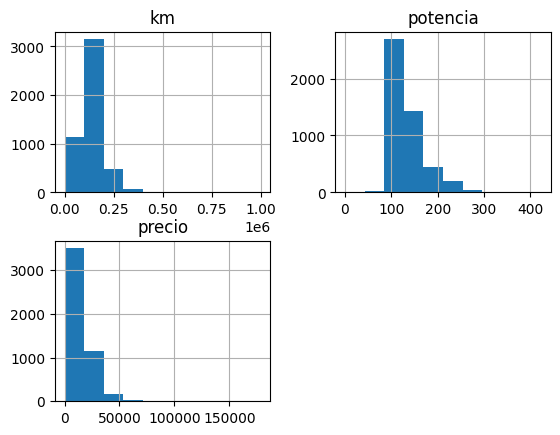

In [12]:
df_bmw2.hist();

In [13]:
df_bmw2.dropna(subset='precio',inplace=True)

In [14]:
df_bmw2.dropna(subset='modelo',inplace=True)

In [15]:
df_bmw2.dropna(subset='fecha_venta',inplace=True)

In [16]:
#median
column_to_fill=['km', 'potencia']
for column in column_to_fill:
    # df_bmw2[column].fillna(df_bmw2[column].mean(),inplace=True)
   df_bmw2[column].fillna(df_bmw2[column].median(),inplace=True)


In [17]:
df_bmw2['fecha_registro'].fillna(method='bfill',inplace=True)

In [18]:
df_bmw2['fecha_registro'].fillna(method='ffill',inplace=True)

In [19]:
for i in ["fecha_registro","fecha_venta"]:
    df_bmw2[i]=pd.to_datetime(df_bmw2[i])

In [23]:
df_bmw2.isna().sum()


modelo                            0
km                                0
potencia                          0
fecha_registro                    0
tipo_gasolina                     5
color                           444
tipo_coche                     1455
volante_regulable                 4
aire_acondicionado              485
camara_trasera                    2
asientos_traseros_plegables    3384
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            0
fecha_venta                       0
dtype: int64

In [21]:
df_bmw3=df_bmw2.copy()

In [25]:
df_bmw3.fillna({'volante_regulable':"Unknown", 'aire_acondicionado': "Unknown", 'tipo_gasolina': "Unknown",'color':"Unknown", 'tipo_coche':"Unknown",
            'camara_trasera': "Unknown", 'asientos_traseros_plegables' :"Unknown",'elevalunas_electrico':"Unknown", 'bluetooth':"Unknown", 'alerta_lim_velocidad':"Unknown"}, inplace=True)

In [26]:
df_bmw3.isna().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

In [27]:
df_bmw3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4833 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4833 non-null   object        
 1   km                           4833 non-null   float64       
 2   potencia                     4833 non-null   float64       
 3   fecha_registro               4833 non-null   datetime64[ns]
 4   tipo_gasolina                4833 non-null   object        
 5   color                        4833 non-null   object        
 6   tipo_coche                   4833 non-null   object        
 7   volante_regulable            4833 non-null   object        
 8   aire_acondicionado           4833 non-null   object        
 9   camara_trasera               4833 non-null   object        
 10  asientos_traseros_plegables  4833 non-null   object        
 11  elevalunas_electrico         4833 non-null   obj

In [29]:
df_bmw3.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,Unknown,True,True,False,Unknown,True,Unknown,True,Unknown,11300.0,2018-01-01
1,M4,13929.0,317.0,2012-04-01,petrol,grey,convertible,True,True,False,Unknown,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,Unknown,False,False,False,Unknown,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2011-05-01,diesel,red,convertible,True,True,False,Unknown,True,True,True,Unknown,25100.0,2018-02-01
4,425,97097.0,160.0,2011-05-01,diesel,silver,Unknown,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [86]:
df_bmw4=df_bmw3.copy()

In [87]:
df_bmw4.replace({True:1,False:0,"Unknown":2},inplace=True) #cambiamos a INT

In [88]:
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4833 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4833 non-null   object        
 1   km                           4833 non-null   float64       
 2   potencia                     4833 non-null   float64       
 3   fecha_registro               4833 non-null   datetime64[ns]
 4   tipo_gasolina                4833 non-null   object        
 5   color                        4833 non-null   object        
 6   tipo_coche                   4833 non-null   object        
 7   volante_regulable            4833 non-null   int64         
 8   aire_acondicionado           4833 non-null   int64         
 9   camara_trasera               4833 non-null   int64         
 10  asientos_traseros_plegables  4833 non-null   int64         
 11  elevalunas_electrico         4833 non-null   int

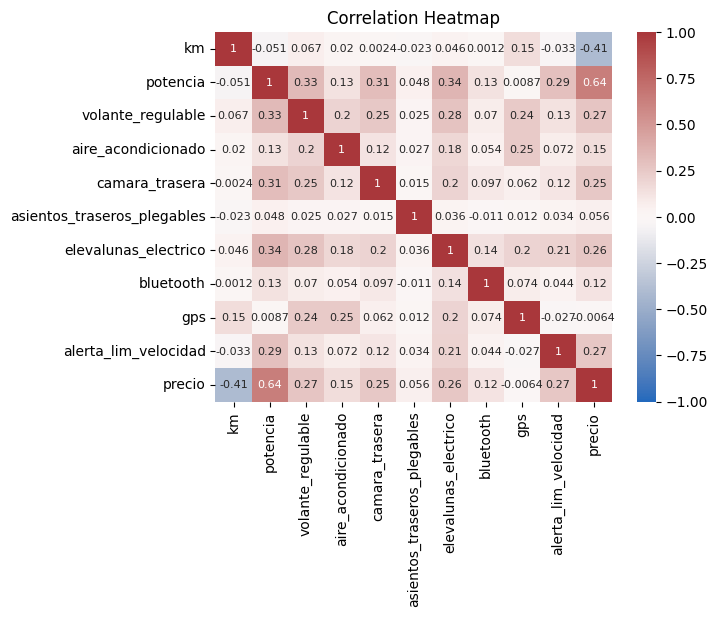

In [89]:
heatmap = sns.heatmap(
    data= df_bmw4.select_dtypes(include='number').corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=sns.color_palette("vlag", as_cmap=True),
    annot_kws={"fontsize":8},
).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=6);

In [90]:
df_bmw4.describe()

,km,potencia,fecha_registro,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
count,4.833000e+03,4833.000000,4833,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833
mean,1.409486e+05,129.008897,2012-12-13 20:30:32.402234624,0.551417,0.916408,0.202152,1.462860,0.461204,0.506518,0.932133,0.763501,15838.154355,2018-04-26 12:34:42.681564160
min,-6.400000e+01,0.000000,1990-03-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,2007-08-01 00:00:00
25%,1.028560e+05,100.000000,2012-07-01 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,10800.000000,2018-03-01 00:00:00
50%,1.410680e+05,120.000000,2013-07-01 00:00:00,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,14200.000000,2018-05-01 00:00:00
75%,1.752350e+05,135.000000,2014-04-01 00:00:00,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,18600.000000,2018-07-01 00:00:00
max,1.000376e+06,423.000000,2017-11-01 00:00:00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,178500.000000,2018-09-01 00:00:00
std,6.020293e+04,39.019265,NaN,0.499062,0.526655,0.402676,0.850543,0.499374,0.742240,0.251543,0.693913,9222.310942,NaN


In [91]:
df_bmw4['aire_acondicionado'].value_counts()

aire_acondicionado
1    3459
0     889
2     485
Name: count, dtype: int64

In [92]:
df_bmw5=df_bmw4.copy()

In [97]:
df_bmw5.drop(df_bmw5[df_bmw5["precio"]<=1000].index,inplace=True)

In [101]:
df_bmw5.drop(df_bmw5[df_bmw5["km"]<=0].index,inplace=True)

In [102]:
df_bmw5.describe()

,km,potencia,fecha_registro,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
count,4.766000e+03,4766.000000,4766,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766.000000,4766
mean,1.401004e+05,129.276332,2012-12-25 01:43:19.916072192,0.557281,0.921947,0.203735,1.461183,0.466849,0.509652,0.935585,0.766890,16035.732270,2018-04-26 16:40:05.035669248
min,4.760000e+02,0.000000,1990-03-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1100.000000,2007-08-01 00:00:00
25%,1.021660e+05,100.000000,2012-07-01 00:00:00,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,10925.000000,2018-03-01 00:00:00
50%,1.405315e+05,120.000000,2013-07-01 00:00:00,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,14300.000000,2018-05-01 00:00:00
75%,1.749892e+05,135.000000,2014-04-01 00:00:00,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,18800.000000,2018-07-01 00:00:00
max,1.000376e+06,423.000000,2017-11-01 00:00:00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,178500.000000,2018-09-01 00:00:00
std,5.922290e+04,39.075328,NaN,0.498447,0.520909,0.403857,0.850938,0.499793,0.742794,0.245516,0.693852,9071.237536,NaN


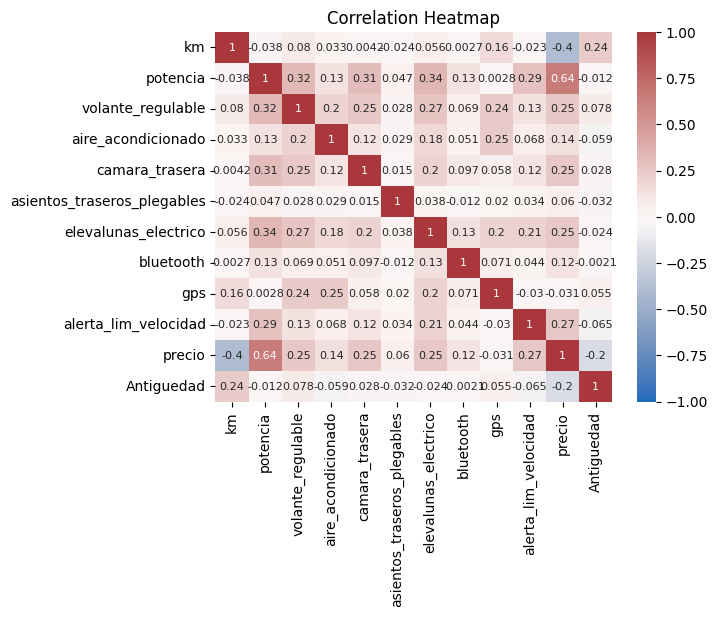

In [110]:
heatmap = sns.heatmap(
    data= df_bmw5.select_dtypes(include='number').corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=sns.color_palette("vlag", as_cmap=True),
    annot_kws={"fontsize":8},
).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=6);

In [104]:
df_bmw5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4766 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4766 non-null   object        
 1   km                           4766 non-null   float64       
 2   potencia                     4766 non-null   float64       
 3   fecha_registro               4766 non-null   datetime64[ns]
 4   tipo_gasolina                4766 non-null   object        
 5   color                        4766 non-null   object        
 6   tipo_coche                   4766 non-null   object        
 7   volante_regulable            4766 non-null   int64         
 8   aire_acondicionado           4766 non-null   int64         
 9   camara_trasera               4766 non-null   int64         
 10  asientos_traseros_plegables  4766 non-null   int64         
 11  elevalunas_electrico         4766 non-null   int

In [124]:
df_bmw5.groupby(['modelo'])['tipo_coche'].unique().reset_index()

,modelo,tipo_coche
0,Active Tourer,[van]
1,114,"[hatchback, 2, subcompact]"
2,116,"[estate, 2, hatchback, sedan, subcompact]"
3,118,"[2, convertible, coupe, hatchback, sedan, subc..."
4,120,"[convertible, 2, hatchback, sedan, subcompact]"
...,...,...
71,X6,"[suv, 2]"
72,X6 M,"[suv, 2]"
73,Z4,"[convertible, 2]"
74,i3,"[2, hatchback]"


In [108]:
df_bmw5["Antiguedad"]=((df_bmw5["fecha_venta"]-df_bmw5["fecha_registro"])/np.timedelta64(1,'Y')).astype(int)

In [109]:
df_bmw5.head(10)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,Antiguedad
0,118,140411.0,100.0,2012-02-01,diesel,black,2,1,1,0,2,1,2,1,2,11300.0,2018-01-01,5
1,M4,13929.0,317.0,2012-04-01,petrol,grey,convertible,1,1,0,2,0,1,1,1,69700.0,2018-02-01,5
2,320,183297.0,120.0,2012-04-01,diesel,white,2,0,0,0,2,1,0,1,0,10200.0,2018-02-01,5
3,420,128035.0,135.0,2011-05-01,diesel,red,convertible,1,1,0,2,1,1,1,2,25100.0,2018-02-01,6
4,425,97097.0,160.0,2011-05-01,diesel,silver,2,1,1,0,0,0,1,1,1,33400.0,2018-04-01,6
5,335,152352.0,225.0,2011-05-01,petrol,black,2,1,1,0,0,1,1,1,1,17100.0,2018-02-01,6
6,325,205219.0,145.0,2009-08-01,diesel,grey,convertible,1,1,0,2,1,1,1,1,12400.0,2018-02-01,8
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,1,1,0,2,0,1,1,0,6100.0,2018-02-01,8
8,Z4,123886.0,125.0,2014-03-01,petrol,black,convertible,1,0,0,0,0,2,1,0,6200.0,2018-03-01,4
9,320,139541.0,135.0,2014-03-01,diesel,white,convertible,0,0,0,2,1,0,1,0,17300.0,2018-03-01,4


In [ ]:
def limpiarString(dataset,campo):
  df_tmp=df_bmw2.groupby(['modelo','potencia'])[campo].unique().reset_index()
  lista_remplace= []
  for i in range(0,len(df_tmp)):
    if len(df_tmp[campo][i])==2:
          if str(df_tmp[campo][i][0])=='nan':
            lista_remplace.append({'modelo':df_tmp['modelo'][i],'potencia':df_tmp['potencia'][i],campo:df_tmp[campo][i][1]})
          elif str(df_tmp[campo][i][1])=='nan':
            lista_remplace.append({'modelo':df_tmp['modelo'][i],'potencia':df_tmp['potencia'][i],campo:df_tmp[campo][i][0]})
          else:
            pass
  return pd.DataFrame(lista_remplace)


In [ ]:
resultat=limpiarString(df_bmw3,'tipo_coche')

In [ ]:
for i in range(0,len(resultat)):

  print(df_bmw3[df_bmw3['modelo']==resultat['modelo'][i] & df_bmw3['potencia']==resultat['potencia'][i] & df_bmw3['tipo_coche']==resultat['tipo_coche'][i]])

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [ ]:
df_bmw2.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                    0
tipo_gasolina                     5
color                           444
tipo_coche                     1455
volante_regulable                 4
aire_acondicionado              485
camara_trasera                    2
asientos_traseros_plegables    3384
elevalunas_electrico              2
bluetooth                       727
gps                               0
alerta_lim_velocidad            727
precio                            0
fecha_venta                       0
dtype: int64

In [ ]:
df_bmw.isnull().sum()/len(df_bmw)*100

modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

In [ ]:
df_bmw.isnull().mean()*100


modelo                          0.061945
km                              0.041297
potencia                        0.020648
fecha_registro                 50.030973
tipo_gasolina                   0.103242
color                           9.188520
tipo_coche                     30.146603
volante_regulable               0.082593
aire_acondicionado             10.035102
camara_trasera                  0.041297
asientos_traseros_plegables    70.018584
elevalunas_electrico            0.041297
bluetooth                      15.032005
gps                             0.000000
alerta_lim_velocidad           15.032005
precio                          0.123890
fecha_venta                     0.020648
dtype: float64

In [ ]:
df_bmw2=df_bmw.copy()

In [ ]:
#

In [ ]:
df_bmw2.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
df_bmw2['asientos_traseros_plegables'].value_counts(normalize=True)

asientos_traseros_plegables
False    0.792011
True     0.207989
Name: proportion, dtype: float64

In [ ]:
tabla=df_bmw2["asientos_traseros_plegables"].value_counts(normalize=True).reset_index()

In [ ]:
tabla

,asientos_traseros_plegables,proportion
0,False,0.792011
1,True,0.207989


In [ ]:
df_bmw2["asientos_traseros_plegables"].isnull().sum()*0.792011

2685.709301

In [ ]:
def mediaBolean(dataset,campo,pr):
  total=(int)(dataset[campo].isnull().sum()*pr)
  dataset[campo].fillna(campo,)
  #print(total)

In [ ]:
mediaBolean(df_bmw2,'asientos_traseros_plegables',0.79)

In [ ]:
df_bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4841 non-null   float64
 2   potencia                     4842 non-null   float64
 3   fecha_registro               2420 non-null   object 
 4   tipo_gasolina                4838 non-null   object 
 5   color                        4398 non-null   object 
 6   tipo_coche                   3383 non-null   object 
 7   volante_regulable            4839 non-null   object 
 8   aire_acondicionado           4357 non-null   object 
 9   camara_trasera               4841 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4841 non-null   object 
 12  bluetooth                    4115 non-null   object 
 13  gps               

In [ ]:
df_bmw2['asientos_traseros_plegables'].value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

In [ ]:
df_bmw2['asientos_traseros_plegables'].fillna(df_bmw2['asientos_traseros_plegables'].mean(), inplace=True)


In [ ]:
df_bmw2['asientos_traseros_plegables'].isnull().sum()

0

In [ ]:
df_bmw2.isnull().sum()

modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables       0
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [ ]:
df_bmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,0.207989,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,0.207989,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,0.207989,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,0.207989,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [ ]:
df_bmw.dropna(subset=["modelo"],inplace=True)

In [ ]:
df_bmw.dropna(subset=["km"],inplace=True)

In [ ]:
df_bmw.dropna(subset=["potencia"],inplace=True)

In [ ]:
df_bmw.dropna(subset=["tipo_gasolina"],inplace=True)

In [ ]:
df_bmw.dropna(subset=["volante_regulable"],inplace=True)

In [ ]:
df_bmw.dropna(subset=["camara_trasera"],inplace=True)

In [ ]:
df_bmw.dropna(subset=["elevalunas_electrico"],inplace=True)

In [ ]:
df_bmw.dropna(subset=["precio"],inplace=True)

In [ ]:
df_bmw.reset_index(drop=True,inplace=True)

In [ ]:
df_bmw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4818 non-null   object 
 1   km                           4818 non-null   float64
 2   potencia                     4818 non-null   float64
 3   fecha_registro               2408 non-null   object 
 4   tipo_gasolina                4818 non-null   object 
 5   color                        4376 non-null   object 
 6   tipo_coche                   3368 non-null   object 
 7   volante_regulable            4818 non-null   object 
 8   aire_acondicionado           4336 non-null   object 
 9   camara_trasera               4818 non-null   object 
 10  asientos_traseros_plegables  1444 non-null   object 
 11  elevalunas_electrico         4818 non-null   object 
 12  bluetooth                    4093 non-null   object 
 13  gps               

In [ ]:
df_bmw.isnull().sum()

modelo                            0
km                                0
potencia                          0
fecha_registro                 2410
tipo_gasolina                     0
color                           442
tipo_coche                     1450
volante_regulable                 0
aire_acondicionado              482
camara_trasera                    0
asientos_traseros_plegables    3374
elevalunas_electrico              0
bluetooth                       725
gps                               0
alerta_lim_velocidad            725
precio                            0
fecha_venta                       1
dtype: int64

In [ ]:
df_bmw.dropna(subset=["tipo_gasolina"],inplace=True)

In [ ]:
df_bmw.describe()

,km,potencia,precio
count,4.818000e+03,4818.000000,4818.000000
mean,1.409619e+05,128.982980,15839.414695
std,6.026481e+04,39.001042,9223.632278
min,-6.400000e+01,0.000000,100.000000
25%,1.027825e+05,100.000000,10825.000000
50%,1.410270e+05,120.000000,14200.000000
75%,1.752478e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


array([[<Axes: title={'center': 'km'}>,
        <Axes: title={'center': 'potencia'}>],
       [<Axes: title={'center': 'precio'}>, <Axes: >]], dtype=object)

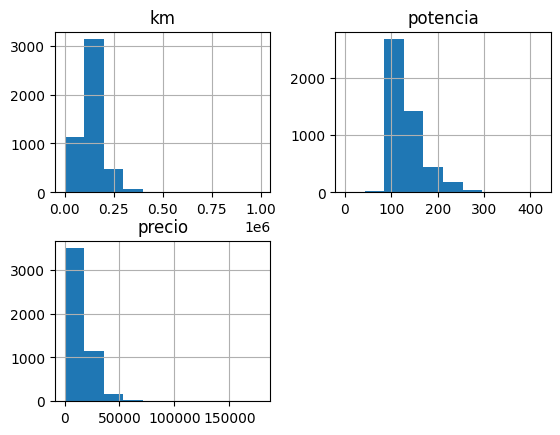

In [ ]:
df_bmw.hist()